In [1]:
# import libraries
import numpy as np
import pandas as pd
import os
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import matplotlib
from tqdm import trange
from time import sleep

%matplotlib inline

matplotlib.rcParams.update({
    'figure.dpi': 300,
    'figure.titlesize': 15,
    'axes.titlesize': 15,
    'axes.labelsize': 13,
    'xtick.labelsize': 11,
    'ytick.labelsize': 11,
    'legend.fontsize': 11,
    'legend.title_fontsize': 13
})

In [14]:
def get_computational_time(df_network, unit = 's'):
    if unit == 's':
        return (df_network['timeStamp'].values[-1] - df_network['timeStamp'].values[0])//1000
    elif unit == 'min':
        return (df_network['timeStamp'].values[-1] - df_network['timeStamp'].values[0])//1000/60.0
    else:
        return (df_network['timeStamp'].values[-1] - df_network['timeStamp'].values[0])

In [27]:
demand_factors = [1, 5, 10, 25, 50]
thread_nums = [1, 2, 4, 8, 16]

# Figure 7 (b)

In [19]:
casenames = os.listdir("exp0/")

In [20]:
computational_time = np.zeros((5, 5)) # the first dimension is demand factor, the second is number of threads

In [31]:
for casename in casenames:
    filenames = os.listdir("exp0/"+casename+"/agg_output/20000_0/")
    for filename in filenames:
        if filename.startswith("NetworkLog"):
            df_network  = pd.read_csv("exp0/"+casename+"/agg_output/20000_0/"+filename)
    i, j = demand_factors.index(int(casename.split('_')[-2])), thread_nums.index(int(casename.split('_')[-1]))
    computational_time[i, j] = get_computational_time(df_network)

In [73]:
# fig, ax = plt.subplots(figsize=(4,3))

# markers = ['o','^','v','x','s']
# for i in range(5):
#     ratio = [1,5,10,25,50][i]
#     plt.plot(range(5), computational_time[i,:], marker = markers[i], markersize= 3, label=f'{ratio}% of demand')

# plt.ylabel("Computational time (s)")
# plt.xlabel("Number of threads")
# plt.xlim([0, 4])
# plt.xticks([0,1,2,3,4],[1,2,4,8,16])
# plt.grid()

# plt.legend()
# plt.tight_layout()
# plt.savefig("fig/exp0/compute_time.png")
# plt.savefig("fig/exp0/compute_time.pdf")

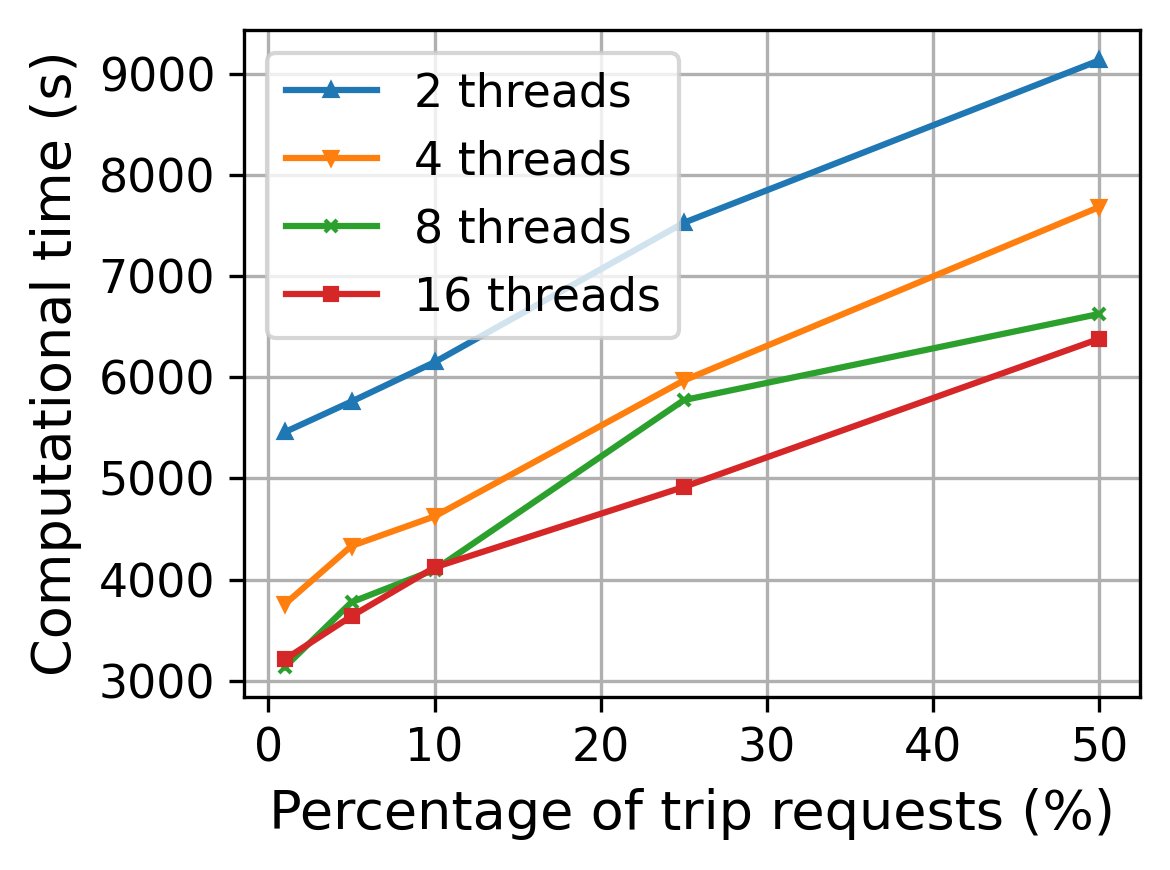

In [72]:
fig, ax = plt.subplots(figsize=(4,3))

markers = ['o','^','v','x','s']
for i in range(1,5):
    threads = [1, 2, 4, 8, 16][i]
    plt.plot([1, 5, 10, 25, 50], computational_time[:,i], marker = markers[i], markersize= 3, label=f'{threads} threads')

plt.ylabel("Computational time (s)")
plt.xlabel("Percentage of trip requests (%)")
# plt.xlim([0, 4])
# plt.xticklabels([1, 5, 10, 25, 50])
plt.grid()

plt.legend()
plt.tight_layout()
plt.savefig("fig/exp0/compute_time.png")
plt.savefig("fig/exp0/compute_time.pdf")

In [61]:
import json

In [64]:
with open("demand_2019-03-29.json") as f:
    test = json.load(f)

In [67]:
res = 0
for _, value in test.items():
    res += np.sum(value)
res

1349341.0